# Project 1 - Regression
## Predict songs popularity
(c) Nuno António 2022 - Rev. 1.0


### 0. Packages,  Libraries and Formating

In [1]:
# Installing the necessary packages:
# Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #visualizations

In [2]:
pip install fastparquet

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Formating that will be applied in all of the notebook
subPlots_Title_fontSize = 12
subPlots_xAxis_fontSize = 15
subPlots_yAxis_fontSize = 10
subPlots_label_fontSize = 12
heatmaps_text_fontSize = 12

plots_Title_fontSize = 14
plots_Title_textColour = 'black'

plots_Legend_fontSize = 12
plots_Legend_textColour = 'black'

# increase the number of columns to display
pd.set_option('display.max_columns', 500)

In [4]:
# Plots a scatterplot with a regression line using given inputs
def regress_plot(x='', y='', data=None, xlab='', ylab='', titl=''):
    data = data.groupby(x)[y].mean().to_frame().reset_index()
    fig, ax = plt.subplots(figsize=(10,6))
    _ = sns.regplot(x=x, y=y, data=data, scatter_kws={'color': 'g', "s": 10}, line_kws={'color':'black'} )
    _ = plt.xlabel(xlab, fontsize=12)
    _ = plt.ylabel(ylab, fontsize=12)
    _ = plt.title(titl, fontsize=14, c='green')
    _ = plt.ylim(-3, 103)
    plt.show()

### 1. Business understanding

Business objective: 
- Build a model to predict the popularity of songs based on the songs' features (the model will be used as a measure to define the promotion budget for each song)

Context:
- Spotify assigns each song values for different attributes. These feauters are originally assigned by Spotify, except for popularity and originality

### 2. Data understanding

#### Songs Popularity Dataset: 
- File name: songs_popularity.xlsx
- Source: 
 - **song_name**: name of the song
 - **song_popularity (target)**: popularity of the song
 - **song_duration_ms**: duration of the song in milliseconds
 - **acousticness**: accousticness of the song
 - **originality**: originality of the song (how different is the song from other songs)
 - **danceability**: danceability of the song
 - **energy**: energy of the song
 - **instrumentalness**: instrumentalness of the song 
 - **key**: key of the song _
 - **liveness**: liveness of the song
 - **loudness**: loudness of the song
 - **audio_mode**: song's mode
 - **speechiness**: speechiness of the song
 - **tempo**: tempo of the song
 - **time_signature**: time signature of the song 
 - **audio_valence**: audio valence of the song

#### External sources consulted:
 - [Spotify Web API reference provides a detailed information about the features](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features) 
It was used for better understanding of variables.
 - [A notebook posted on GitHub with same variables but with 160K rows](https://github.com/MattD82/Predicting-Spotify-Song-Popularity/blob/master/README.md) 
Used for considering modelling options.
 - [Dataset with useful features that we don't have](https://jovian.com/gohilbhagyaraj17/song-popularity-prediction) it's also 41 times bigger than our.

In [5]:
# Loading the dataset: 
ds = pd.read_excel('songs_popularity.xlsx')

#### Explore Data

In [6]:
# Check the data type of each column
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   originality       5742 non-null   float64
 5   danceability      18835 non-null  float64
 6   energy            18835 non-null  float64
 7   instrumentalness  18829 non-null  float64
 8   key               18835 non-null  int64  
 9   liveness          18835 non-null  float64
 10  loudness          18835 non-null  float64
 11  audio_mode        18835 non-null  int64  
 12  speechiness       18835 non-null  float64
 13  tempo             18835 non-null  float64
 14  time_signature    18835 non-null  int64  
 15  audio_valence     18835 non-null  float64
dtypes: float64(10), int64(5), object(1)
memo

In [7]:
#The variables that are categorical were recognised as floats, convert them into categorical 
ds['song_name'] = ds['song_name'].astype(str)
ds['key'] = ds['key'].astype('category')
ds['time_signature'] = ds['time_signature'].astype('category')
ds['audio_mode'] = ds['audio_mode'].astype('category')

In [8]:
# Show top rows
ds.head()

,song_name,song_popularity,song_duration_ms,acousticness,originality,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,NaN,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,NaN,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,NaN,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,NaN,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,NaN,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [9]:
# Here we define a popular song with popularity score above 75, later on it is used for data visualisation by features
# These score was selected based on the general knowledge, we noticed that songs above 75 are recognised easily
ds['popular_song'] = ds[['song_popularity']] > 75
ds.head()

,song_name,song_popularity,song_duration_ms,acousticness,originality,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popular_song
0,Boulevard of Broken Dreams,73,262333,0.005520,NaN,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,False
1,In The End,66,216933,0.010300,NaN,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,False
2,Seven Nation Army,76,231733,0.008170,NaN,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,True
3,By The Way,74,216933,0.026400,NaN,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,False
4,How You Remind Me,56,223826,0.000954,NaN,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,False


In [10]:
# This definition splits the dataset: popular songs are 15% 
ds['popular_song'].value_counts()

False    16258
True      2577
Name: popular_song, dtype: int64

In [11]:
# Check missing values
print(ds.isnull().sum())

song_name               0
song_popularity         0
song_duration_ms        0
acousticness            0
originality         13093
danceability            0
energy                  0
instrumentalness        6
key                     0
liveness                0
loudness                0
audio_mode              0
speechiness             0
tempo                   0
time_signature          0
audio_valence           0
popular_song            0
dtype: int64


In [12]:
# Visualizing summary statistics
ds.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
song_name,18835,13070,Better,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
song_popularity,18835.0,NaN,NaN,NaN,52.991877,21.905654,0.0,40.0,56.0,69.0,100.0
song_duration_ms,18835.0,NaN,NaN,NaN,218211.587576,59887.540566,12000.0,184339.5,211306.0,242844.0,1799346.0
acousticness,18835.0,NaN,NaN,NaN,0.258539,0.288719,0.000001,0.0241,0.132,0.424,0.996
originality,5742.0,NaN,NaN,NaN,50.679032,29.07375,1.0,26.0,52.0,76.0,100.0
danceability,18835.0,NaN,NaN,NaN,0.633348,0.156723,0.0,0.533,0.645,0.748,0.987
energy,18835.0,NaN,NaN,NaN,0.644995,0.214101,0.00107,0.51,0.674,0.815,0.999
instrumentalness,18829.0,NaN,NaN,NaN,0.080157,0.264622,0.0,0.0,0.000011,0.00259,10.0
key,18835.0,12.0,0.0,2182.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
liveness,18835.0,NaN,NaN,NaN,0.17965,0.143984,0.0109,0.0929,0.122,0.221,0.986


After looking at the data summary statistics, it can be seen that some values are outside the range that Spotify API suggests: instrumentalness and loudness
Also tempo value equal to zero seems strange, check below

In [13]:
#songs with tempo=0 have other feauters outside the range, we consider these entries are wrong, later they are cleaned
ds.query("tempo == 0")

,song_name,song_popularity,song_duration_ms,acousticness,originality,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popular_song
7119,Gina Rodriguez - Latinos Trending Intro,0,12000,0.7000,NaN,0.0,0.493,0.000,7,0.457,-6.102,1,0.0,0.0,0,0.0,False
11171,Aura,50,102536,0.0774,NaN,0.0,0.560,0.963,11,0.589,-9.866,1,0.0,0.0,0,0.0,False


In [14]:
# Checking the top repetitions of song_name column
ds['song_name'].value_counts(sort=True).head(50) 

Better                                            21
FEFE (feat. Nicki Minaj & Murda Beatz)            19
MIA (feat. Drake)                                 18
Taki Taki (with Selena Gomez, Ozuna & Cardi B)    18
No Stylist                                        17
Promises (with Sam Smith)                         16
Electricity (with Dua Lipa)                       16
I Love It (& Lil Pump)                            16
Mo Bamba                                          16
Sunflower - Spider-Man: Into the Spider-Verse     16
Lullaby                                           15
Love Someone                                      14
Happier                                           14
Fall                                              14
Wake Up in the Sky                                14
ZEZE (feat. Travis Scott & Offset)                14
Be Alright                                        14
I Like It                                         13
This Feeling                                  

In [15]:
# Checking the difference between the lines of the most repeated song:
ds.loc[ds['song_name']=='Better'] 

,song_name,song_popularity,song_duration_ms,acousticness,originality,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popular_song
1524,Better,64,201250,0.5810,NaN,0.597,0.425,0.000000,2,0.100,-5.513,1,0.0295,119.998,4,0.309,False
3151,Better,95,229412,0.0984,NaN,0.442,0.585,0.391000,0,0.140,-10.332,0,0.0964,97.565,4,0.116,True
7182,Better,78,229412,0.0860,NaN,0.683,0.562,0.279000,0,0.120,-10.315,0,0.0605,98.027,4,0.149,True
7571,Better,44,229320,0.1020,NaN,0.695,0.586,0.317000,0,0.113,-10.315,0,0.0658,98.035,4,0.112,False
7626,Better,44,229320,0.1020,NaN,0.695,0.586,0.317000,0,0.113,-10.315,0,0.0658,98.035,4,0.112,False
8897,Better,78,229412,0.0860,NaN,0.683,0.562,0.279000,0,0.120,-10.315,0,0.0605,98.027,4,0.149,True
9949,Better,49,191996,0.0256,NaN,0.565,0.861,0.539000,4,0.363,-5.205,0,0.0658,159.975,4,0.738,False
10892,Better,44,229320,0.1020,NaN,0.695,0.586,0.317000,0,0.113,-10.315,0,0.0658,98.035,4,0.112,False
11760,Better,78,229412,0.0860,NaN,0.683,0.562,0.279000,0,0.120,-10.315,0,0.0605,98.027,4,0.149,True
12079,Better,1,207111,0.1550,NaN,0.574,0.689,0.000000,11,0.140,-6.512,1,0.0568,88.207,4,0.664,False


In [16]:
# Here we see some songs that have that have identical values in each feature, except for originality
# Moreover, originality is only present in less than 30% of the rows,therefore it is removed 
ds = ds.drop('originality', axis=1)
ds

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popular_song
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,False
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,False
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,True
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,False
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300,False
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265,False
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286,False
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323,False


In [17]:
# Now with no originality, there are duplicated that are possible to detect
ds = ds.drop_duplicates()
ds

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popular_song
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,False
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,False
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,True
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,False
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300,False
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265,False
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286,False
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323,False


In [18]:
# dataset has some rows with all duplicated feature values except for popularity
columns = ds.columns.tolist()
columnsNoPopularity = columns.copy()
columnsNoPopularity.remove('song_popularity')
ds[ds.duplicated(subset=columnsNoPopularity,keep=False)].sort_values('song_name')

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popular_song
8358,2002,87,186986,0.037200,0.697,0.683,0.000000,1,0.1370,-2.881,0,0.1170,96.133,4,0.6030,True
11326,2002,85,186986,0.037200,0.697,0.683,0.000000,1,0.1370,-2.881,0,0.1170,96.133,4,0.6030,True
7938,99 Pace,23,197147,0.041200,0.661,0.783,0.895000,11,0.3070,-8.987,1,0.0425,139.966,4,0.0689,False
7939,99 Pace,0,197147,0.041200,0.661,0.783,0.895000,11,0.3070,-8.987,1,0.0425,139.966,4,0.0689,False
18284,Achoo,62,244000,0.167000,0.659,0.839,0.000000,2,0.3890,-4.106,1,0.1620,119.935,4,0.6240,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,Your Song,64,256746,0.345000,0.486,0.486,0.000000,9,0.1390,-7.103,1,0.0290,128.768,4,0.1840,False
6469,broken,49,204878,0.002360,0.667,0.716,0.000002,7,0.0421,-5.693,1,0.0478,122.976,4,0.4400,False
9629,broken,5,204878,0.002360,0.667,0.716,0.000002,7,0.0421,-5.693,1,0.0478,122.976,4,0.4400,False
18016,hometown,58,256071,0.000621,0.315,0.826,0.000669,7,0.0703,-4.315,0,0.0644,139.163,4,0.3590,False


In [19]:
# since the popularity scores from duplicated rows differs a lot, all these rows have to be removed
ds = ds.drop_duplicates(subset=columnsNoPopularity,keep=False)
ds

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popular_song
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474,False
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370,False
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324,True
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198,False
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300,False
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265,False
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286,False
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323,False


In [20]:
# According to Spotify documentation, time signature range is between 3 and 7, therefore values outside of the range are removed.
ds = ds.query('time_signature >= 3 & time_signature <= 7')

In [21]:
ds.query('instrumentalness > 1 | instrumentalness.isnull()', engine='python')

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popular_song
11,Numb,63,185586,0.00460,0.496,0.863,NaN,9,0.6390,-4.153,1,0.0381,110.018,4,0.243,False
188,"Independent Women, Pt. 1",63,221626,0.38800,0.517,0.598,NaN,6,0.1830,-3.751,0,0.2630,96.933,4,0.922,False
400,And It Stoned Me,50,272160,0.35000,0.593,0.468,NaN,7,0.0919,-11.165,1,0.0285,75.798,4,0.597,False
601,You Shook Me All Night Long,77,210173,0.00287,0.532,0.767,NaN,7,0.3900,-5.509,1,0.0574,127.361,4,0.755,True
1162,Who Knew,66,208493,0.00462,0.688,0.733,NaN,9,0.0756,-4.569,1,0.0274,140.004,4,0.459,False
1299,Historia de un Amor,46,168866,0.71700,0.612,0.233,NaN,7,0.1230,-12.989,0,0.1120,119.105,4,0.749,False
1426,City of Stars,56,154858,0.93400,0.531,0.116,10.0,6,0.0981,-11.157,1,0.0548,117.469,3,0.176,False
1427,Take Me To Church (Acoustic Cover) feat. Matt ...,60,277802,0.74500,0.637,0.292,10.0,4,0.3050,-8.206,0,0.0375,127.015,3,0.400,False
1428,Ho Hey,54,126440,0.60100,0.692,0.434,10.0,1,0.1020,-8.530,1,0.0260,82.978,4,0.455,False
1429,Hey Ya - solo version,61,298800,0.66500,0.661,0.184,10.0,1,0.1060,-13.644,0,0.0380,140.006,4,0.357,False


In [22]:
# removing rows with instrumentalness outside of the range 0 to 1
ds = ds[ds['instrumentalness'] < 1]
ds = ds.dropna(subset=['instrumentalness'])

In [23]:
# removing rows with loudness outside of the range 0 to -60
ds = ds[ds['loudness'] < 0]

##### Checking the distributions

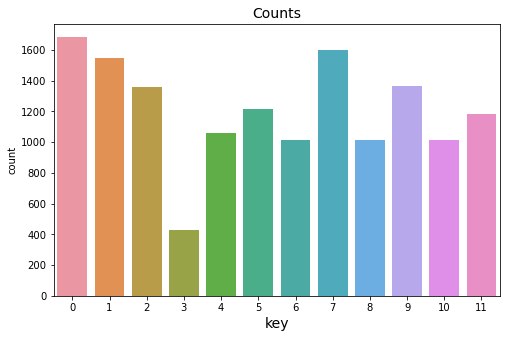

In [24]:
# Visualising distribution of categorical variables 
fig, ax = plt.subplots(1,1, figsize=(8,5))
_ = sns.countplot(x='key', data=ds)
_ = plt.xlabel('key', fontsize=14)
_ = plt.title('Counts', fontsize=14)

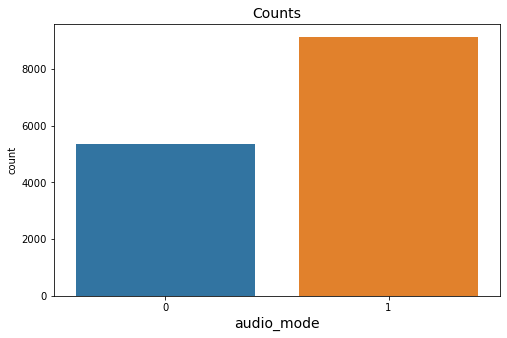

In [25]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
_ = sns.countplot(x='audio_mode', data=ds)
_ = plt.xlabel('audio_mode', fontsize=14)
_ = plt.title('Counts', fontsize=14)

In [26]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
_ = sns.countplot(x='time_signature', data=ds
_ = plt.xlabel('time_signature', fontsize=14)
_ = plt.title('Time signature counts', fontsize=14)

SyntaxError: invalid syntax (1133258416.py, line 3)

This chart confirms that the time signature = 4 is the most widespread. Here we check if the distribution for the popilar songs is any different

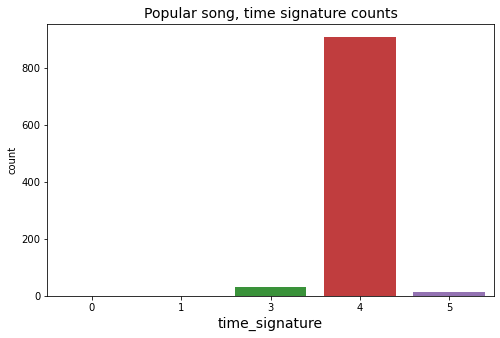

In [27]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
_ = sns.countplot(x='time_signature', data=ds[ds['popular_song']])
_ = plt.xlabel('time_signature', fontsize=14)
_ = plt.title('Popular song, time signature counts', fontsize=14)

We see that the trend is the same, even more songs have time signature = 4 inside popular song group. 93% have signature 4 in unpopular and 95% for the popular one.

In [28]:
x,y = 'popular_song', 'time_signature'

(ds
.groupby(x)[y]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index())

,popular_song,time_signature,percent
0,False,4,93.878004
1,False,3,4.783734
2,False,5,1.338262
3,False,0,0.000000
4,False,1,0.000000
5,True,4,95.688749
6,True,3,3.049422
7,True,5,1.261830
8,True,0,0.000000
9,True,1,0.000000


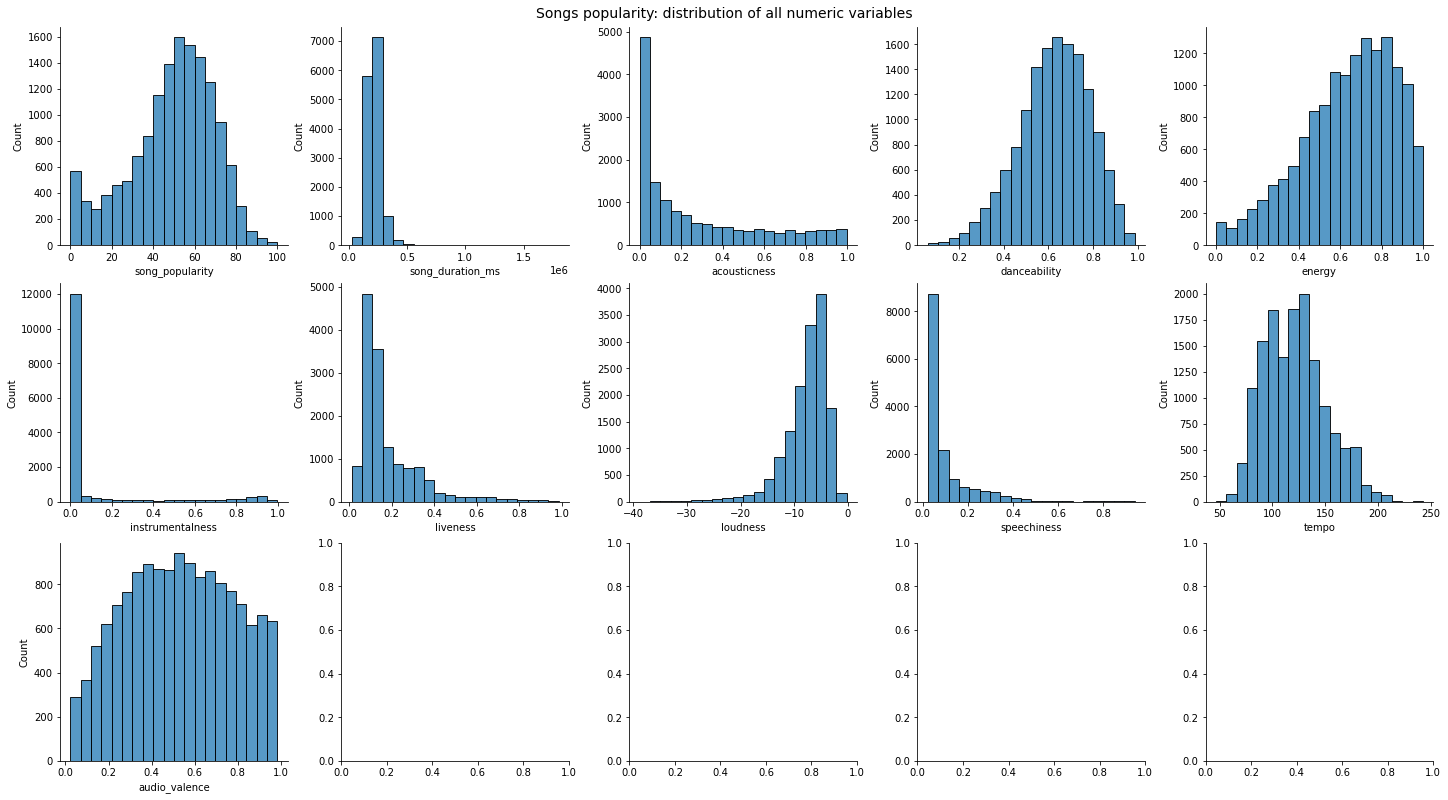

In [29]:
# HISTOGRAM (ALL NUMERIC VARIABLES)
# Identify all numeric variables in the dataset
numerical=ds.select_dtypes(include=[np.number]).columns.tolist()

# Draw
fig, ax = plt.subplots(3, 5, figsize=(20,11), constrained_layout = True) # Added constrained_layout to avoid overlapping
for var, subplot in zip(ds[numerical], ax.flatten()):
    g = sns.histplot(data=ds,
                bins=20,
                x=var,
                ax=subplot,
                kde=False)

# Decoration
sns.despine()
plt.rc('axes', labelsize=subPlots_label_fontSize)
fig.suptitle("Songs popularity: distribution of all numeric variables", fontsize=plots_Title_fontSize);

# Save to file
#fig.savefig(fname=exportsFolder+'MultipleHistogram.svg', bbox_inches="tight")

Here we can see that instrumentalness have a lot of observations that are 0, we need to check if there is any difference in the distribution between popular and unpopular song.

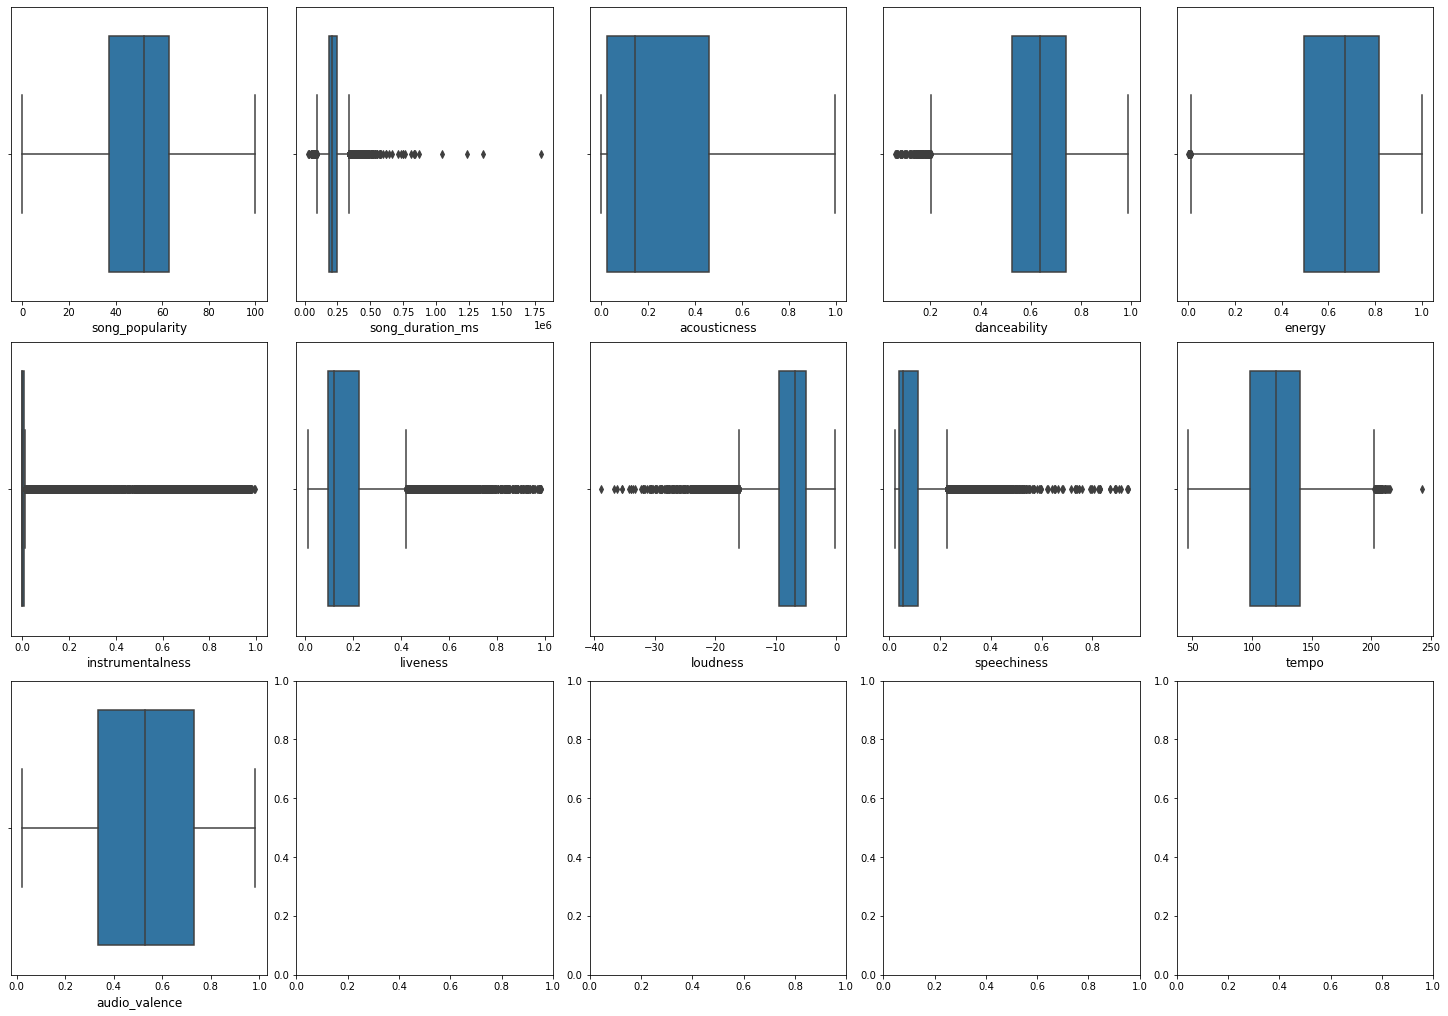

In [30]:
numerical=ds.select_dtypes(include=[np.number]).columns.tolist()
fig, ax = plt.subplots(3, 5, figsize=(20, 14), constrained_layout = True)
for var, subplot in zip(ds[numerical], ax.flatten()):
    sns.boxplot(x=ds[var], ax=subplot)
    

#### Observations:
There are outliers in song duration and tempo.
To set a threshold for outliers we chose to focus on popular songs. We take the maximum duration and maximum tempo of the song that are considered popular as the upper border.

From business understanding it seems that songs which are extremely long or which have exremely high BPM have less chances in becoming popular

In [31]:
ds.query("song_popularity >= 60").describe().T 

,count,mean,std,min,25%,50%,75%,max
song_popularity,4750.0,69.495579,7.375833,60.000000,64.000000,68.000000,74.00000,100.000
song_duration_ms,4750.0,220299.329263,51933.630702,50014.000000,188964.250000,213611.000000,245330.00000,578040.000
acousticness,4750.0,0.242933,0.280255,0.000005,0.025325,0.123500,0.37200,0.996
danceability,4750.0,0.635438,0.151576,0.061700,0.538000,0.645000,0.74500,0.980
energy,4750.0,0.647159,0.212719,0.001070,0.518250,0.681000,0.81200,0.997
instrumentalness,4750.0,0.050457,0.182125,0.000000,0.000000,0.000004,0.00056,0.969
liveness,4750.0,0.176486,0.140850,0.021500,0.092400,0.120000,0.21500,0.978
loudness,4750.0,-7.197053,3.861780,-36.281000,-8.628250,-6.277500,-4.75100,-0.257
speechiness,4750.0,0.098635,0.098459,0.022400,0.037500,0.054900,0.11400,0.869
tempo,4750.0,120.799993,28.644748,46.591000,98.145750,119.974500,139.17775,216.115


On Spotify the songs over 75 are pretty popular while the ones over 55 are not. 
However, a cutoff of 55 appears have a duration twice as long the second one and then the duration start to decrease slowly, that's why 60 seems as a more reasonable cutoff.

In [32]:
ds.query("song_popularity >= 55").sort_values("song_duration_ms", ascending = False)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popular_song
17797,Play,59,1355938,0.000308,0.197,0.8370,0.752000,9,0.102,-8.958,1,0.0626,186.443,4,0.1360,False
236,El Cantante,58,622520,0.422000,0.489,0.6790,0.000007,7,0.130,-4.899,0,0.0326,95.813,4,0.6580,False
15240,Innerbloom,60,578040,0.125000,0.729,0.7200,0.353000,3,0.178,-6.690,1,0.0371,122.015,4,0.0388,False
6085,Bela Lugosi's Dead,55,577226,0.003520,0.453,0.7210,0.833000,11,0.698,-13.164,0,0.0533,149.557,4,0.6010,False
6234,"Viajo Sin Ver (Remix) [feat. De La Ghetto, Alm...",66,569260,0.556000,0.805,0.8230,0.000000,10,0.163,-3.368,0,0.2860,147.973,4,0.3870,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11095,Mosaic - Skit,55,64719,0.685000,0.772,0.0383,0.731000,10,0.112,-16.941,0,0.4850,89.058,4,0.9610,False
1757,Party In The U.S.A.,55,63080,0.822000,0.519,0.3600,0.000000,10,0.177,-8.575,0,0.1050,97.420,4,0.7000,False
4137,Here Too Far,62,55213,0.974000,0.516,0.0971,0.951000,5,0.108,-20.081,1,0.0559,107.037,4,0.4600,False
10706,Tykky Interludium,58,50508,0.870000,0.721,0.1750,0.902000,7,0.107,-12.387,1,0.0717,80.965,4,0.6320,False


In [33]:
# Here we remove songs that have high song duration or tempo
durationCutoff = ds.query("song_popularity >= 60")["song_duration_ms"].max()
tempoCutoff = ds.query("song_popularity >= 60")["tempo"].max()

ds = ds.loc[(ds["song_duration_ms"] <= durationCutoff) & (ds["tempo"] <= tempoCutoff)]

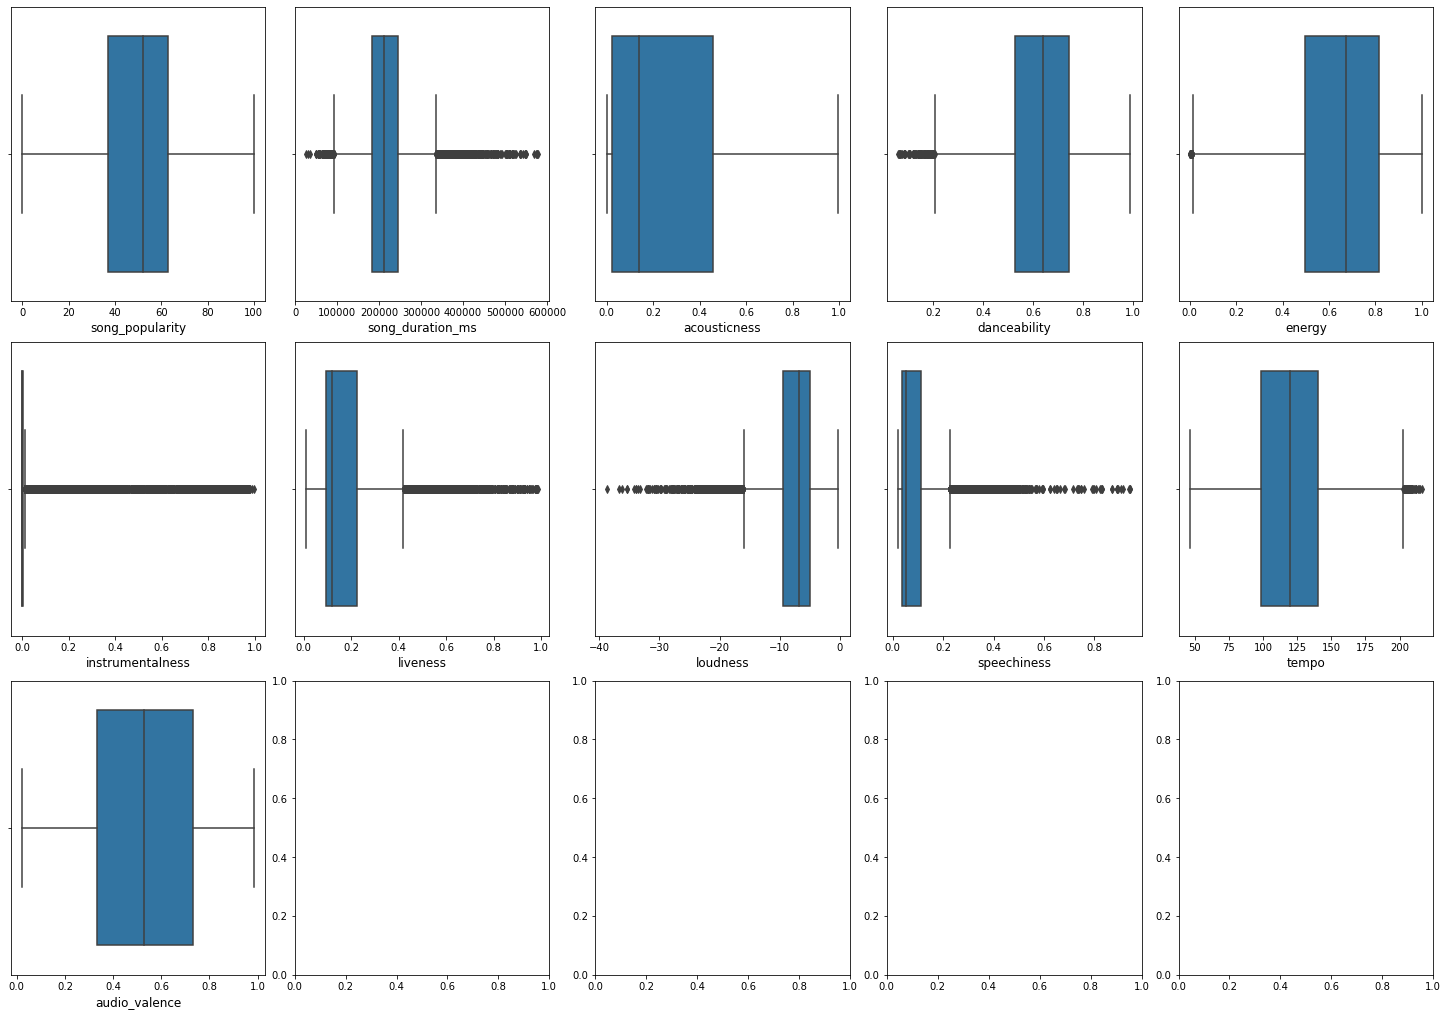

In [34]:
#Reviewing distribution after removing outliers
numerical=ds.select_dtypes(include=[np.number]).columns.tolist()
fig, ax = plt.subplots(3, 5, figsize=(20, 14), constrained_layout = True)
for var, subplot in zip(ds[numerical], ax.flatten()):
    sns.boxplot(x=ds[var], ax=subplot)

In [35]:
#Pair plot variables for popular and unpopular songs in order to see the difference in distribution
cols=['song_duration_ms','acousticness','danceability','energy','liveness','popular_song', 'loudness', 'audio_valence', 'tempo']
g = sns.pairplot(ds[cols], hue="popular_song", data=ds)
my_palette = sns.color_palette(["red", "blue"])

TypeError: pairplot() got multiple values for argument 'data'

In [ ]:
# Violin plot for popular and unpopular songs in order to see the difference in distribution
sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(12,4))
fig.suptitle('Distributions of Selected Features at Popularity Score Cutoff of 75')
    
sns.violinplot(x=ds['popular_song'], y=ds['danceability'], ax=ax[0])
sns.violinplot(x=ds['popular_song'], y=ds['audio_valence'], ax=ax[1])
sns.violinplot(x=ds['popular_song'], y=ds['acousticness'], ax=ax[2])
    
plt.show()

sns.set(style="whitegrid")

fig, ax = plt.subplots(1, 3, sharey=True, figsize=(12,4))
fig.suptitle('Distributions of Selected Features at Popularity Score Cutoff of 75')

sns.violinplot(x=ds['popular_song'], y=ds['energy'], ax=ax[0])
sns.violinplot(x=ds['popular_song'], y=ds['instrumentalness'], ax=ax[1])
sns.violinplot(x=ds['popular_song'], y=ds['liveness'], ax=ax[2])
    
plt.show()

#### Observations:
- Overall, visually, there is not much difference between popular and unpopular distribition
- Popular songs are slightly more danceable, more energetic, have slightly higher valence and slightly less instrumental. We will see in the next plot if there is a positive correaltion on these variables.

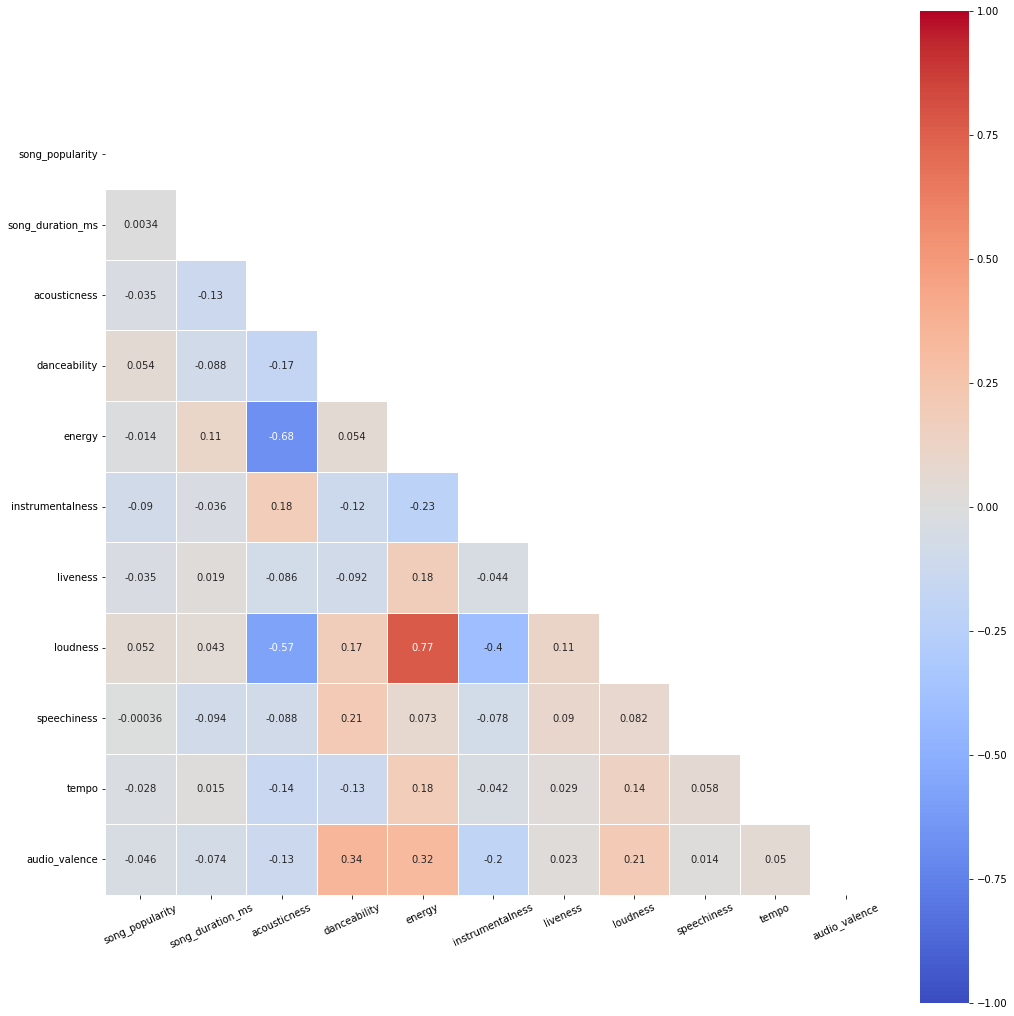

In [36]:
corr = ds[numerical].corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(14, 14), constrained_layout = True)
heatmap = sns.heatmap(corr,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 10})

#add the column names as labels
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns, rotation = 25)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})


#### Observations:
- Energy and loudness are positively correlated to each other and they are negatively correlated to acousticness.
- Then as we can see there is a negative correlation between energy and song popularity even from the violin plot seems that energic song are more popular. That's becuase mean and median energy for popular song is higher.
- We can notice that none of these variables are highly correlated with song popularity.

In [37]:
ds[ds['popular_song']]['energy'].describe()

count    951.000000
mean       0.662861
std        0.172905
min        0.056500
25%        0.551000
50%        0.690000
75%        0.797500
max        0.989000
Name: energy, dtype: float64

In [38]:
ds[ds['popular_song'] == False]['energy'].describe()

count    13505.000000
mean         0.637357
std          0.224773
min          0.001070
25%          0.491000
50%          0.670000
75%          0.819000
max          0.999000
Name: energy, dtype: float64

## Saving cleaned data

We save our cleaned data with parquet in order to keep the data type as they are.   
We will remove song_name and popular_song because they are used only here in order to do data understanding.

In [44]:
# Pay attention to use fastparquet as engine, pyarrow in older version doesn't save categorical as categorical
ds.drop(columns=['song_name','popular_song']).to_parquet('ds.parquet.snappy', engine='fastparquet')

### One hot econding
Some algorithms like linear regression can handle only numerical variable, so we will make a dataset with encoded variables.

In [45]:
oneHotEncoded = pd.get_dummies(ds, columns=['key','audio_mode','time_signature'])
oneHotEncoded = oneHotEncoded.drop(columns=['time_signature_0','time_signature_1','song_name','popular_song'])
oneHotEncoded.head()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence,key_0,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,audio_mode_0,audio_mode_1,time_signature_3,time_signature_4,time_signature_5
0,73,262333,0.005520,0.496,0.682,0.000029,0.0589,-4.095,0.0294,167.060,0.474,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
1,66,216933,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0.0498,105.256,0.370,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,76,231733,0.008170,0.737,0.463,0.447000,0.2550,-7.828,0.0792,123.881,0.324,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,74,216933,0.026400,0.451,0.970,0.003550,0.1020,-4.938,0.1070,122.444,0.198,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,56,223826,0.000954,0.447,0.766,0.000000,0.1130,-5.065,0.0313,172.011,0.574,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [47]:
oneHotEncoded.to_parquet('oneHotEncoded1.parquet.snappy', engine='fastparquet')

## Considerations

**Model used**  
We tried to use linear regression, decision three and MLPRegressor. The decision three at the end was the best one, than we have the linear regression one and the last is MLPRegressor this one was way far from the other two.

**Feature selection**
- To find the ideal combination of variables to be included in the model in order to reach the best result possible, some tests were made:  
>- 1. using all the features; 
>- 2. using recommended features by the RFECV (only the linear regression); 
>- 3. using random columns; (just to prove that the problem is not the feature selection, but the imbalanced dataset.)
- In the three cases the result was not higly affected.

**What's next**

It was possible to conclude that the results were not as good for having a dataset with low number of registers with high or low popularity. This was expected since we saw a notebook with the same features and 10 times that data that we have during the business understanding, but still not able to achieve a good result. In that notebook the only improvement achieved was possible thanks to undersampling. The best notebook that we found had also other features that we don't have like the artist that made the song that was the most important feature. So in order to have a good result we need not only more data but also more features.
